# Data Preprocessing


## Imports

In [4]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import librosa
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from IPython.display import Image 
import plotly.graph_objects as go

In [5]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [6]:
from clean_audio import CleanAudio
from file_handler import FileHandler
from audio_vis import AudioVis

In [7]:
clean_audio = CleanAudio()
file_handler = FileHandler()
audio_vis = AudioVis()

## Load Data


In [8]:
PATH_TRAIN_WAV = "../data/AMHARIC/train/wav/"
PATH_TEST_WAV = "../data/AMHARIC/test/wav/"
PATH_TRAIN_TEXT = "../data/AMHARIC/train/text"
PATH_TEST_TEXT = "../data/AMHARIC/test/text"

In [9]:
train_labels = os.listdir(PATH_TRAIN_WAV)
test_labels = os.listdir(PATH_TEST_WAV)
train_labels = [i.strip('.wav') for i in train_labels]
test_labels = [i.strip('.wav') for i in test_labels]
print(f"Total training data: {len(train_labels)}")
print(f"Total test data: {len(test_labels)}")

Total training data: 10875
Total test data: 359


## Create Metadata

In [10]:
text_data, label_data = file_handler.read_data(PATH_TRAIN_TEXT, PATH_TEST_TEXT, train_labels, test_labels)
print(f"Total training data: {len(text_data)}")
print(f"Total test data: {len(label_data)}")

Total training data: 11234
Total test data: 11234


In [11]:
data = pd.DataFrame({'key': label_data, 'text': text_data})
data[:5]

,key,text
0,tr_10000_tr097082,የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ተቋማትን እንዲ መሰርቱ ትልማ አይ ፈቅድ ም
1,tr_10001_tr097083,የ ጠመንጃ ተኩስ ተከፈተ ና አራት የኤርትራ ወታደሮች ተገደሉ
2,tr_10002_tr097084,ላነሷቸው ጥያቄዎች የ ሰጡት ን መልስ አቅርበ ነዋል
3,tr_10003_tr097085,እ ብዱ አስፋልቱ ላይ የ ኰለኰ ለ ው ድንጋይ መኪና አላ ሳልፍ አለ
4,tr_10004_tr097086,ጠጁ ን ኰ መኰ መ ኰ መኰ መ ና ሚስቱ ን ሲ ያሰቃ ያት አደረ


In [12]:
y = [x in test_labels for x in data.key]
data["category"] = ["Test" if i else "Train" for i in y]
data[:5]

,key,text,category
0,tr_10000_tr097082,የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ተቋማትን እንዲ መሰርቱ ትልማ አይ ፈቅድ ም,Train
1,tr_10001_tr097083,የ ጠመንጃ ተኩስ ተከፈተ ና አራት የኤርትራ ወታደሮች ተገደሉ,Train
2,tr_10002_tr097084,ላነሷቸው ጥያቄዎች የ ሰጡት ን መልስ አቅርበ ነዋል,Train
3,tr_10003_tr097085,እ ብዱ አስፋልቱ ላይ የ ኰለኰ ለ ው ድንጋይ መኪና አላ ሳልፍ አለ,Train
4,tr_10004_tr097086,ጠጁ ን ኰ መኰ መ ኰ መኰ መ ና ሚስቱ ን ሲ ያሰቃ ያት አደረ,Train


In [13]:
data["char_length"] = [len(i) for i in data.text]
data[:5]

,key,text,category,char_length
0,tr_10000_tr097082,የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ተቋማትን እንዲ መሰርቱ ትልማ አይ ፈቅድ ም,Train,73
1,tr_10001_tr097083,የ ጠመንጃ ተኩስ ተከፈተ ና አራት የኤርትራ ወታደሮች ተገደሉ,Train,38
2,tr_10002_tr097084,ላነሷቸው ጥያቄዎች የ ሰጡት ን መልስ አቅርበ ነዋል,Train,32
3,tr_10003_tr097085,እ ብዱ አስፋልቱ ላይ የ ኰለኰ ለ ው ድንጋይ መኪና አላ ሳልፍ አለ,Train,42
4,tr_10004_tr097086,ጠጁ ን ኰ መኰ መ ኰ መኰ መ ና ሚስቱ ን ሲ ያሰቃ ያት አደረ,Train,39


In [14]:
duration_of_recordings = []
for i in range(data.shape[0]):
    path = ""
    if data.category[i] == "Train":
        path = PATH_TRAIN_WAV + data.key[i] + ".wav"
    else:
        path = PATH_TEST_WAV + data.key[i] + ".wav"


    audio, fs = librosa.load(path, sr=None)
    duration_of_recordings.append(float(len(audio) / fs))

In [15]:
data["duration"] = duration_of_recordings
data[:5]

,key,text,category,char_length,duration
0,tr_10000_tr097082,የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ተቋማትን እንዲ መሰርቱ ትልማ አይ ፈቅድ ም,Train,73,9.09
1,tr_10001_tr097083,የ ጠመንጃ ተኩስ ተከፈተ ና አራት የኤርትራ ወታደሮች ተገደሉ,Train,38,5.63
2,tr_10002_tr097084,ላነሷቸው ጥያቄዎች የ ሰጡት ን መልስ አቅርበ ነዋል,Train,32,6.14
3,tr_10003_tr097085,እ ብዱ አስፋልቱ ላይ የ ኰለኰ ለ ው ድንጋይ መኪና አላ ሳልፍ አለ,Train,42,5.76
4,tr_10004_tr097086,ጠጁ ን ኰ መኰ መ ኰ መኰ መ ና ሚስቱ ን ሲ ያሰቃ ያት አደረ,Train,39,5.38


## Data Exploration

In [13]:
data.describe()

,char_length,duration
count,11234.00,11234.00
mean,55.26,6.65
std,28.69,3.06
min,10.00,1.79
25%,33.00,4.35
50%,47.00,5.82
75%,74.00,8.32
max,163.00,24.19


### Transcription

In [ ]:
words_in_data = pd.DataFrame(' '.join(data['text']).split())
words_in_data.columns = ['word']
words_data = words_in_data.groupby(['word']).agg({'word': 'count'})
words_data.columns = ['counts']
words_data.reset_index(inplace=True)
words_data = words_data.sort_values("counts", ascending=False)
words_data.head()

,word,counts
11779,የ,7952
4889,በ,6570
7746,ን,6470
7704,ና,3238
2708,ም,2958


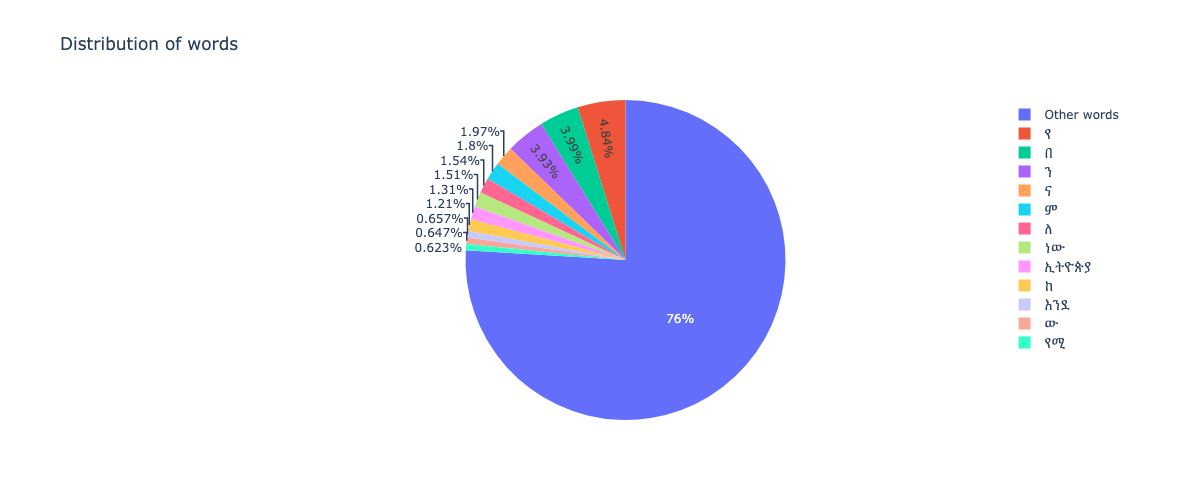

In [ ]:
words_data.loc[words_data['counts'] < 1000, 'word'] = 'Other words'
fig = px.pie(words_data, values='counts', names='word', title='Distribution of words', width=800, height=500)
Image(pio.to_image(fig, format='png', width=1200))

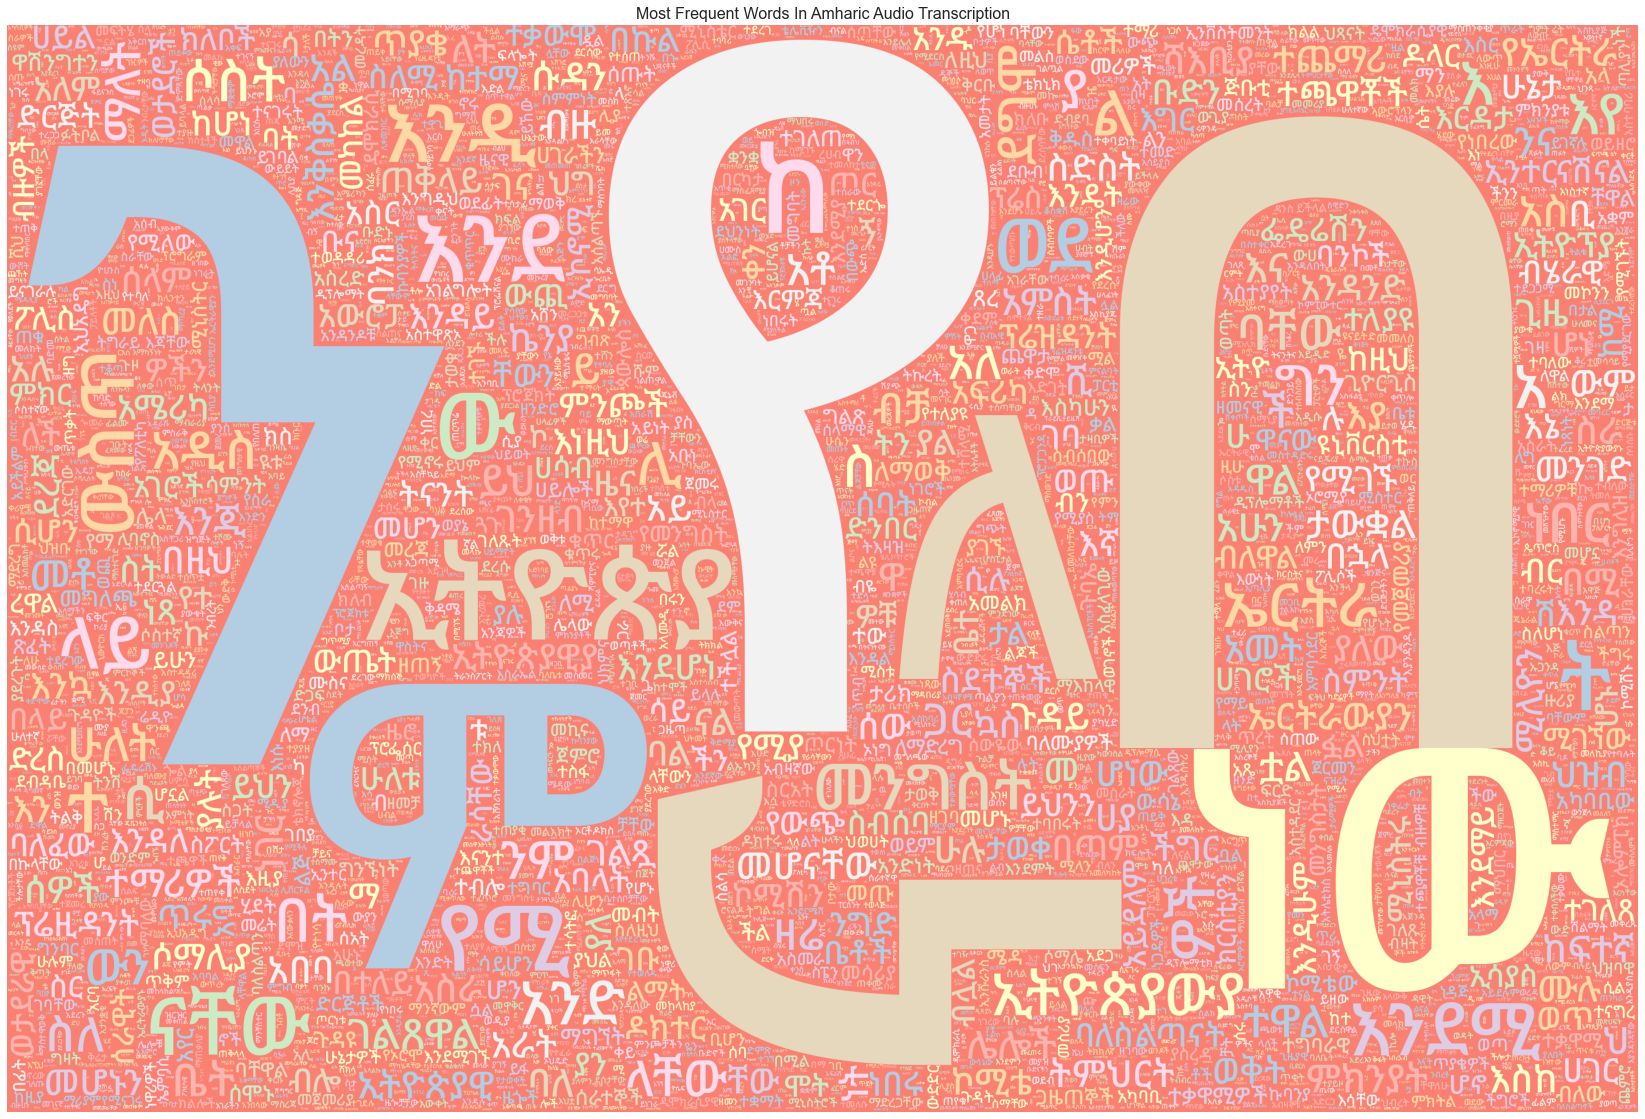

In [ ]:
audio_vis.get_wc(data, 'text', [])

### Audio


In [15]:
def get_paths(category, key):
  if(category == "Train"):
    return PATH_TRAIN_WAV + key + ".wav"
  else:
    return PATH_TEST_WAV + key + ".wav"

In [16]:
path_to_sample = get_paths(data.category[0], data.key[0])
sample_audio, sr = file_handler.read_audio_signal(path_to_sample)
print(sr)
print(sample_audio)

22000
[-0.11535194 -0.13088593 -0.11130099 ... -0.12260991 -0.14306018
 -0.09356608]


In [17]:
audio_vis.play_audio(sample_audio)

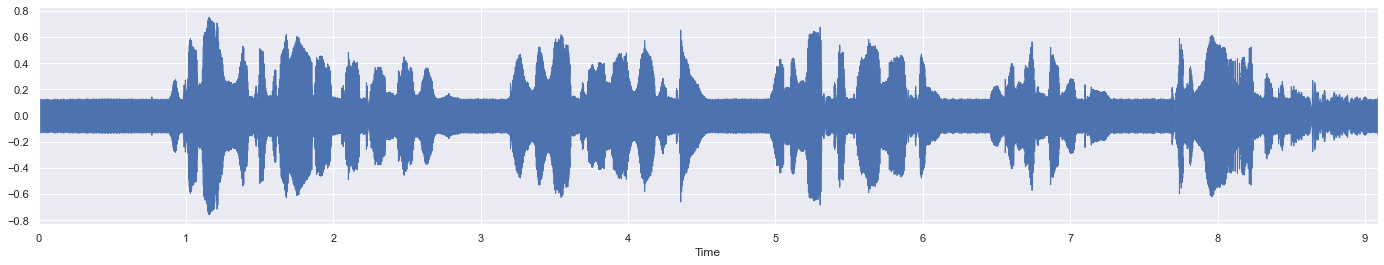

In [18]:
audio_vis.wav_plot(sample_audio)

## Remove Outliers

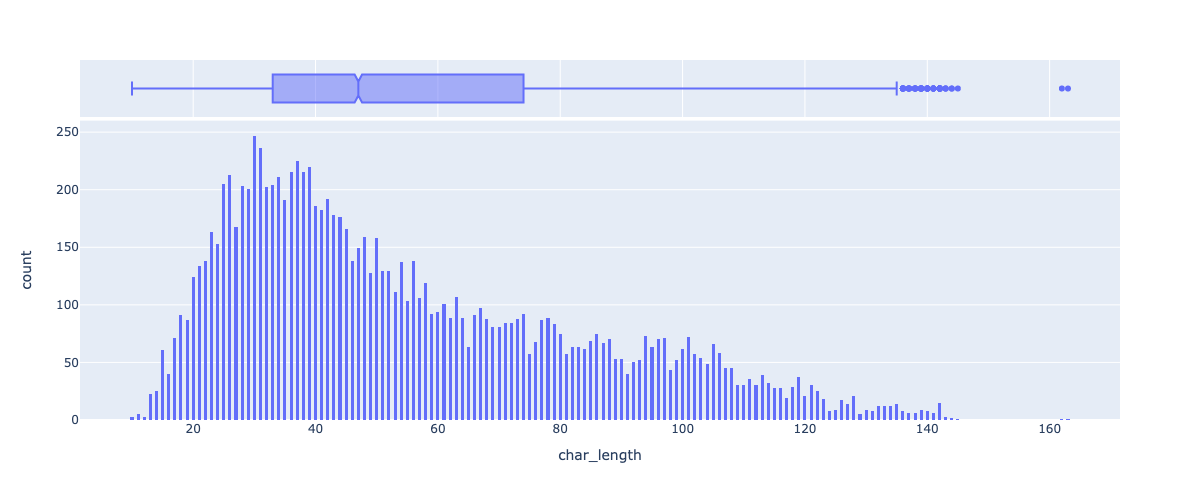

In [ ]:
fig = px.histogram(data, x="char_length", marginal="box", nbins=500)
Image(pio.to_image(fig, format='png', width=1200))

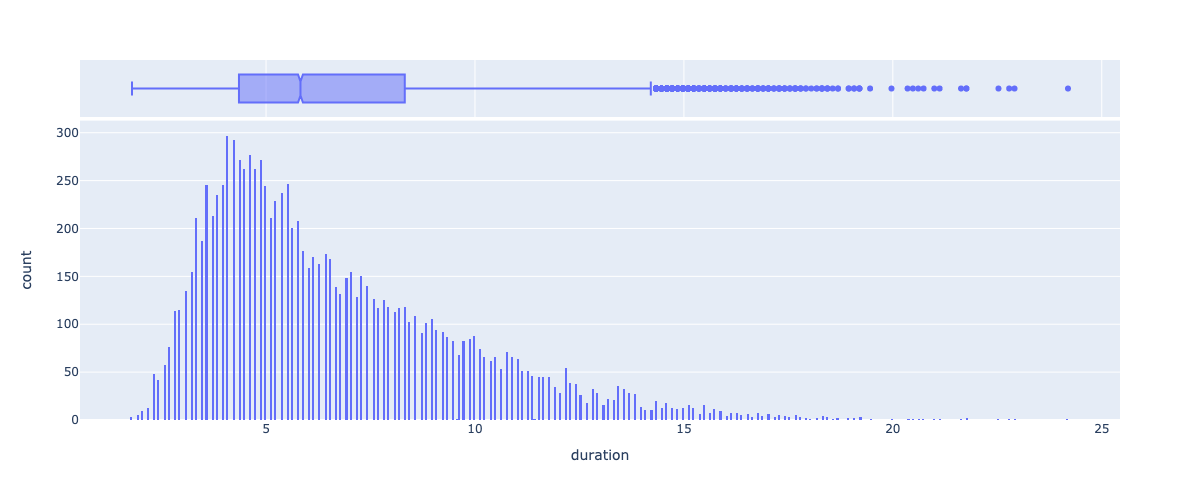

In [ ]:
fig = px.histogram(data, x="duration", marginal="box", nbins=500)
Image(pio.to_image(fig, format='png', width=1200))

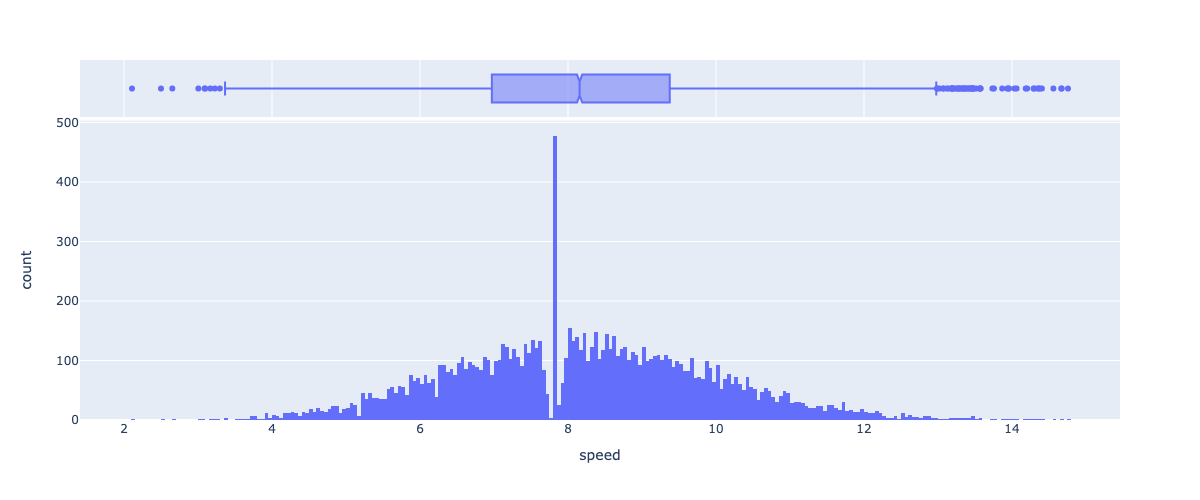

In [ ]:
data["speed"] = data.char_length / data.duration
fig = px.histogram(data, x="speed", marginal="box", nbins=500)
Image(pio.to_image(fig, format='png', width=1200))

## Clean Audio

## Clean Text

In [16]:
clean_word_dict = file_handler.read_text("./amharic_spell_corrector/data/dictionary.txt")
clean_word_list = []
for i in clean_word_dict:
  clean_word_list.append(i.split(" ")[0])

clean_word_list[:10]

['ነው', 'ላይ', 'ውስጥ', 'እና', 'ወደ', 'ጋር', 'ነበር', 'ጊዜ', 'ግን', 'ነገር']

In [21]:
def get_clean_word(words, position):
  word = temp_word = words[position]
  position = position + 1
  move_with_error = 0
  print("---------------------------------")
  while((position < len(words) - 1) and (move_with_error < 5)):  # Give it five tries
    print(f"word :{word} | temp_word: {temp_word} | position {position} | move_with_error: {move_with_error}")
    new_word = temp_word + words[position]
    if(new_word in clean_word_list):
      temp_word = new_word
      word = temp_word
      position = position + 1
      move_with_error = 0
    else:
      temp_word = new_word
      move_with_error = move_with_error + 1
  return word, position


In [23]:
clean_text = []
for sent in data.text[:6]:
  words = sent.split(" ")
  clean_sent = []
  position = 0
  while(position < len(words)-1):
    clean_word, position = get_clean_word(words, position)
    clean_sent.append(clean_word)
  clean_text.append(" ".join(clean_sent))
  print(f"\nsentance: {sent}")
  print(f"clean sentance: {(' '.join(clean_sent))}\n\n")

---------------------------------
word :የተለያዩ | temp_word: የተለያዩ | position 1 | move_with_error: 0
word :የተለያዩ | temp_word: የተለያዩየ | position 1 | move_with_error: 1
word :የተለያዩ | temp_word: የተለያዩየየ | position 1 | move_with_error: 2
word :የተለያዩ | temp_word: የተለያዩየየየ | position 1 | move_with_error: 3
word :የተለያዩ | temp_word: የተለያዩየየየየ | position 1 | move_with_error: 4
---------------------------------
word :የ | temp_word: የ | position 2 | move_with_error: 0
word :የትግራይ | temp_word: የትግራይ | position 3 | move_with_error: 0
word :የትግራይ | temp_word: የትግራይአውራጃ | position 3 | move_with_error: 1
word :የትግራይ | temp_word: የትግራይአውራጃአውራጃ | position 3 | move_with_error: 2
word :የትግራይ | temp_word: የትግራይአውራጃአውራጃአውራጃ | position 3 | move_with_error: 3
word :የትግራይ | temp_word: የትግራይአውራጃአውራጃአውራጃአውራጃ | position 3 | move_with_error: 4
---------------------------------
word :አውራጃ | temp_word: አውራጃ | position 4 | move_with_error: 0
word :አውራጃ | temp_word: አውራጃተወላጆች | position 4 | move_with_error: 1
word :አውራጃ

In [56]:
data.to_csv('../data/clean_data.csv')

## Save the data in numpy format

Saving the data in numpy format will increase the read spread significantly
